# Bibliotecas / Conectar o Drive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# UTI's e Enfermarias (Antes da Atualização)

## Lendo Arquivos

In [ ]:
df_compilados = pd.read_excel("/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Visualização de leitos de UTI's e Enfermarias/Compilado COVID-19 SERGIPE.xlsx", skiprows=19)
compilados = df_compilados.copy()

**Legenda:**

**TESTES REALIZADOS:** Número total de testes realizados.

**TESTES NEGATIVADOS:** Número total de testes com resultado negativo para a COVID-19.

**TESTES CONFIRMADOS:** Número total de testes com resultado positivo para a COVID-19.

**Nº DE CASOS POR DIA:** Número de pacientes confirmados por dia para a CODIV-19.

**ISOLAMENTO DOMICILIAR:** Número total de pacientes em isolamento domiciliar.

**ALTA ISOLAMENTO DOMICILIAR:** Número total de pacientes curados.

**Nº DE LEITOS UTI:** Número total de leitos de UTI em Sergipe (público + privado).

**Nº DE LEITOS  ENFERMARIA:** Número total de leitos de enfermaria em Sergipe (público + privado).

**INTERNADOS:** Número total de internados em UTI e Enfermaria de Sergipe (público + privado).

**ENFERMARIA SUS:** Número total de internados em leitos públicos de enfermaria em Sergipe.

**UTI PRIVADO:** Número total de internados em leitos de UTI privado em Sergipe.

**ENFERMARIA PRIVADO:** Número total de internados em leitos privados de enfermaria em Sergipe.                                                                                                                                                                                                                                                                                                  																

In [ ]:
compilados.head()

,DATA,TESTES REALIZADOS,TESTES NEGATIVADOS,TESTES CONFIRMADOS,Nº DE CASOS POR DIA,MASCULINO,FEMININO,ÓBITOS,ISOLAMENTO DOMICILIAR,ALTA ISOLAMENTO DOMICILIAR,Nº DE LEITOS UTI,Nº DE LEITOS ENFERMARIA,INTERNADOS,UTI SUS,ENFERMARIA SUS,UTI PRIVADO,ENFERMARIA PRIVADO
0,2021-05-10,443784,231916,211868,836,92446,119422,4554,13323,193177,416,562,814,225,236,157,196
1,2021-05-09,442219,231187,211032,713,92084,118948,4526,13068,192625,422,572,813,219,231,154,209
2,2021-05-08,440726,230407,210319,887,91764,118555,4498,12716,192282,422,572,823,218,239,160,206
3,2021-05-07,438812,229380,209432,1075,91349,118083,4469,12485,191647,430,580,831,227,245,163,196
4,2021-05-06,436878,228521,208357,1031,90845,117512,4441,11904,191196,429,580,816,224,240,167,185


## Organizando DataFrame

In [ ]:
compilados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATA                        405 non-null    datetime64[ns]
 1   TESTES REALIZADOS           404 non-null    object        
 2   TESTES NEGATIVADOS          404 non-null    object        
 3   TESTES CONFIRMADOS          404 non-null    object        
 4   Nº DE CASOS POR DIA         404 non-null    object        
 5   MASCULINO                   404 non-null    object        
 6   FEMININO                    404 non-null    object        
 7   ÓBITOS                      404 non-null    object        
 8   ISOLAMENTO DOMICILIAR       403 non-null    object        
 9   ALTA ISOLAMENTO DOMICILIAR  398 non-null    object        
 10  Nº DE LEITOS UTI            382 non-null    object        
 11  Nº DE LEITOS  ENFERMARIA    382 non-null    object        

In [ ]:
for col in list(compilados.columns):
  if col != "DATA":
    compilados[col] = compilados[col].apply(lambda x: str(x).replace('-', '0').replace('nan', '0'))
    compilados[col] = compilados[col].apply(lambda x: float(x))

## Separando os Dados e exportando DataFrame

In [ ]:
colunas = ["DATA", "Nº DE LEITOS UTI", "Nº DE LEITOS  ENFERMARIA ", "INTERNADOS", "UTI SUS", "ENFERMARIA SUS", "UTI PRIVADO", "ENFERMARIA PRIVADO"]
compilados_UTIs_Enfermarias = compilados.filter(items=colunas)

In [ ]:
compilados_UTIs_Enfermarias.head()

,DATA,Nº DE LEITOS UTI,Nº DE LEITOS ENFERMARIA,INTERNADOS,UTI SUS,ENFERMARIA SUS,UTI PRIVADO,ENFERMARIA PRIVADO
0,2021-05-10,416.0,562.0,814.0,225.0,236.0,157.0,196.0
1,2021-05-09,422.0,572.0,813.0,219.0,231.0,154.0,209.0
2,2021-05-08,422.0,572.0,823.0,218.0,239.0,160.0,206.0
3,2021-05-07,430.0,580.0,831.0,227.0,245.0,163.0,196.0
4,2021-05-06,429.0,580.0,816.0,224.0,240.0,167.0,185.0


In [ ]:
compilados_UTIs_Enfermarias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DATA                       405 non-null    datetime64[ns]
 1   Nº DE LEITOS UTI           406 non-null    float64       
 2   Nº DE LEITOS  ENFERMARIA   406 non-null    float64       
 3   INTERNADOS                 406 non-null    float64       
 4   UTI SUS                    406 non-null    float64       
 5   ENFERMARIA SUS             406 non-null    float64       
 6   UTI PRIVADO                406 non-null    float64       
 7   ENFERMARIA PRIVADO         406 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 25.5 KB


In [ ]:
compilados_UTIs_Enfermarias.to_csv("/content/drive/MyDrive/VisaVi-SE/Visualização de leitos de UTI's e Enfermarias/DF_UTI's_Enfermarias_SERGIPE.csv")

## Gerando gráficos

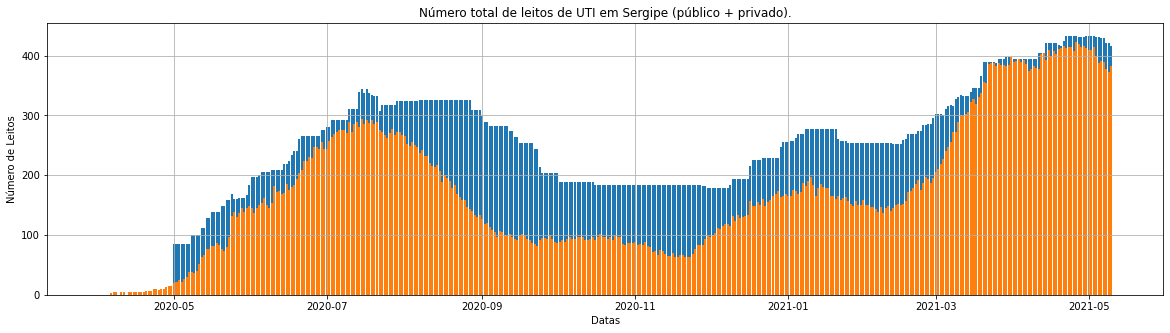

In [ ]:
fig,ax = plt.subplots(figsize=(20, 5))
plt.bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['Nº DE LEITOS UTI'])
plt.bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['UTI SUS'] + compilados_UTIs_Enfermarias['UTI PRIVADO'])
ax.set_title('Número total de leitos de UTI em Sergipe (público + privado).')
ax.set_ylabel('Número de Leitos')
ax.set_xlabel('Datas')
plt.grid(True)

plt.show()

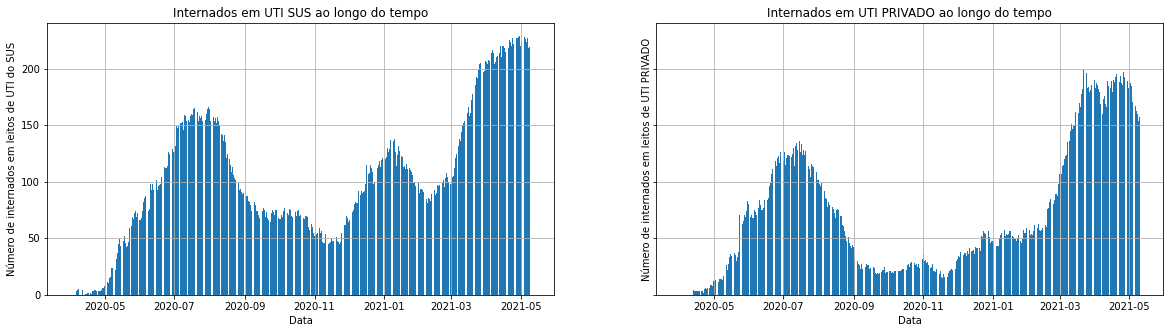

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey=True)

axes[0].bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['UTI SUS'])
axes[0].set_ylabel('Número de internados em leitos de UTI do SUS')
axes[0].set_xlabel('Data')
axes[0].grid(True)
axes[0].set_title('Internados em UTI SUS ao longo do tempo')

axes[1].bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['UTI PRIVADO'])
axes[1].set_ylabel('Número de internados em leitos de UTI PRIVADO')
axes[1].set_xlabel('Data')
axes[1].grid(True)
axes[1].set_title('Internados em UTI PRIVADO ao longo do tempo')

plt.show()

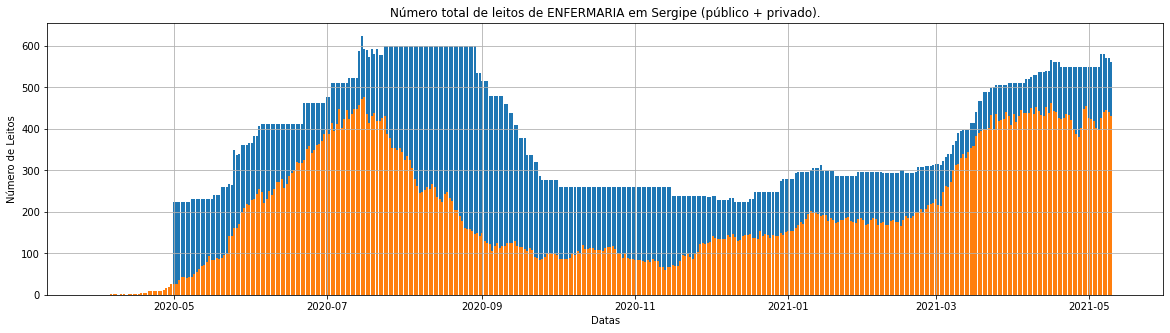

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))

plt.bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['Nº DE LEITOS  ENFERMARIA '])
plt.bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['ENFERMARIA SUS'] + compilados_UTIs_Enfermarias['ENFERMARIA PRIVADO'])
ax.set_title('Número total de leitos de ENFERMARIA em Sergipe (público + privado).')
ax.set_ylabel('Número de Leitos')
ax.set_xlabel('Datas')
plt.grid(True)

plt.show()

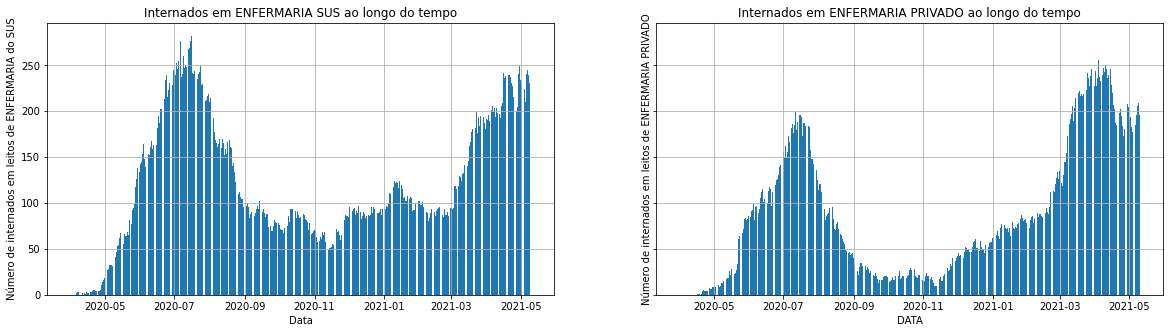

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey=True)

axes[0].bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['ENFERMARIA SUS'])
axes[0].set_ylabel('Número de internados em leitos de ENFERMARIA do SUS')
axes[0].set_xlabel('Data')
axes[0].grid(True)
axes[0].set_title('Internados em ENFERMARIA SUS ao longo do tempo')

axes[1].bar(compilados_UTIs_Enfermarias['DATA'], compilados_UTIs_Enfermarias['ENFERMARIA PRIVADO'])
axes[1].set_ylabel('Número de internados em leitos de ENFERMARIA PRIVADO')
axes[1].set_xlabel('DATA')
axes[1].grid(True)
axes[1].set_title('Internados em ENFERMARIA PRIVADO ao longo do tempo')

plt.show()

# UTI's e Enfermarias (Depois da Atualização)

## Lendo Arquivos

In [3]:
caminho = "/content/drive/MyDrive/VisaVi-SE/Conteúdo do Portal/Visualização de leitos de UTI's e Enfermarias/Compilado COVID-19 SERGIPE.xlsx"
df_compilados = pd.read_excel(caminho, skiprows=19)
compilados = df_compilados.copy()

In [4]:
df_compilados.head()

,DATA,TESTES REALIZADOS,TESTES NEGATIVADOS,TESTES CONFIRMADOS,Nº DE CASOS POR DIA,MASCULINO,FEMININO,ÓBITOS,ISOLAMENTO DOMICILIAR,ALTA ISOLAMENTO DOMICILIAR,Nº DE LEITOS UTI PÚBLICO E PRIVADO,Nº DE LEITOS DE UTI PÚBLICO,Nº DE LEITOS DE UTI PRIVADO,Nº DE LEITOS ENFERMARIA PÚBLICO E PRIVADO,Nº DE LEITOS DE ENFERMARIA PÚBLICO,Nº DE LEITOS DE ENFERMARIA PRIVADO,INTERNADOS PÚBLICO E PRIVADO,UTI SUS OCUPAÇÃO,ENFERMARIA SUS OCUPAÇÃO,UTI PRIVADO OCUPAÇÃO,ENFERMARIA PRIVADO OCUPAÇÃO
0,2021-09-29 00:00:00,603206,325126,278080,30,122479,155601,6009,2070,269960,142,109.0,33.0,173,130.0,43.0,41,16,10,6,9
1,2021-09-28 00:00:00,602593,324543,278050,14,122469,155581,6008,2065,269937,139,109.0,30.0,182,130.0,52.0,40,17,7,9,7
2,2021-09-27 00:00:00,602132,324096,278036,22,122463,155573,6008,2083,269900,139,109.0,30.0,182,130.0,52.0,45,17,12,7,9
3,2021-09-26 00:00:00,602067,324053,278014,19,122457,155557,6008,2108,269855,139,109.0,30.0,182,130.0,52.0,43,16,13,7,7
4,2021-09-25 00:00:00,601869,323874,277995,31,122451,155544,6008,2139,269807,139,109.0,30.0,182,130.0,52.0,41,15,13,8,5


**TESTES REALIZADOS:** Número total de testes realizados.

**TESTES NEGATIVADOS:** Número total de testes com resultado negativo para a COVID-19.

**TESTES CONFIRMADOS:** Número total de testes com resultado positivo para a COVID-19.

**Nº DE CASOS POR DIA:** Número de pacientes confirmados por dia para a CODIV-19.

**ISOLAMENTO DOMICILIAR:** Número total de pacientes em isolamento domiciliar.

**ALTA ISOLAMENTO DOMICILIAR:** Número total de pacientes curados.

**Nº DE LEITOS UTI:** Número total de leitos de UTI em Sergipe (público + privado).

**Nº DE LEITOS  ENFERMARIA:** Número total de leitos de enfermaria em Sergipe (público + privado).

**INTERNADOS:** Número total de internados em UTI e Enfermaria de Sergipe (público + privado).

**ENFERMARIA SUS:** Número total de internados em leitos públicos de enfermaria em Sergipe.

**UTI PRIVADO:** Número total de internados em leitos de UTI privado em Sergipe.

**ENFERMARIA PRIVADO:** Número total de internados em leitos privados de enfermaria em Sergipe.                                                                                                                                                                                                                                                                                                  																

In [5]:
compilados.head()

,DATA,TESTES REALIZADOS,TESTES NEGATIVADOS,TESTES CONFIRMADOS,Nº DE CASOS POR DIA,MASCULINO,FEMININO,ÓBITOS,ISOLAMENTO DOMICILIAR,ALTA ISOLAMENTO DOMICILIAR,Nº DE LEITOS UTI PÚBLICO E PRIVADO,Nº DE LEITOS DE UTI PÚBLICO,Nº DE LEITOS DE UTI PRIVADO,Nº DE LEITOS ENFERMARIA PÚBLICO E PRIVADO,Nº DE LEITOS DE ENFERMARIA PÚBLICO,Nº DE LEITOS DE ENFERMARIA PRIVADO,INTERNADOS PÚBLICO E PRIVADO,UTI SUS OCUPAÇÃO,ENFERMARIA SUS OCUPAÇÃO,UTI PRIVADO OCUPAÇÃO,ENFERMARIA PRIVADO OCUPAÇÃO
0,2021-09-29 00:00:00,603206,325126,278080,30,122479,155601,6009,2070,269960,142,109.0,33.0,173,130.0,43.0,41,16,10,6,9
1,2021-09-28 00:00:00,602593,324543,278050,14,122469,155581,6008,2065,269937,139,109.0,30.0,182,130.0,52.0,40,17,7,9,7
2,2021-09-27 00:00:00,602132,324096,278036,22,122463,155573,6008,2083,269900,139,109.0,30.0,182,130.0,52.0,45,17,12,7,9
3,2021-09-26 00:00:00,602067,324053,278014,19,122457,155557,6008,2108,269855,139,109.0,30.0,182,130.0,52.0,43,16,13,7,7
4,2021-09-25 00:00:00,601869,323874,277995,31,122451,155544,6008,2139,269807,139,109.0,30.0,182,130.0,52.0,41,15,13,8,5


## Organizando DataFrame

In [6]:
compilados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   DATA                                         556 non-null    object 
 1   TESTES REALIZADOS                            546 non-null    object 
 2   TESTES NEGATIVADOS                           546 non-null    object 
 3   TESTES CONFIRMADOS                           546 non-null    object 
 4   Nº DE CASOS POR DIA                          546 non-null    object 
 5   MASCULINO                                    546 non-null    object 
 6   FEMININO                                     546 non-null    object 
 7   ÓBITOS                                       546 non-null    object 
 8   ISOLAMENTO DOMICILIAR                        545 non-null    object 
 9   ALTA ISOLAMENTO DOMICILIAR                   540 non-null    object 
 10  Nº

In [7]:
for col in list(compilados.columns):
  if col != "DATA":
    compilados[col] = compilados[col].apply(lambda x: str(x).replace('-', '0').replace('nan', '0'))
    compilados[col] = compilados[col].apply(lambda x: float(x))

In [8]:
# Verifica a estrutura atual das datas

print(compilados.DATA[1])
print(type(compilados.DATA[1]))
print(str(compilados.DATA[1])[:11])

2021-09-28 00:00:00
<class 'datetime.datetime'>
2021-09-28 


In [9]:
# Detecta valores vazios na coluna de datas

compilados.loc[compilados['DATA'].isna()]

,DATA,TESTES REALIZADOS,TESTES NEGATIVADOS,TESTES CONFIRMADOS,Nº DE CASOS POR DIA,MASCULINO,FEMININO,ÓBITOS,ISOLAMENTO DOMICILIAR,ALTA ISOLAMENTO DOMICILIAR,Nº DE LEITOS UTI PÚBLICO E PRIVADO,Nº DE LEITOS DE UTI PÚBLICO,Nº DE LEITOS DE UTI PRIVADO,Nº DE LEITOS ENFERMARIA PÚBLICO E PRIVADO,Nº DE LEITOS DE ENFERMARIA PÚBLICO,Nº DE LEITOS DE ENFERMARIA PRIVADO,INTERNADOS PÚBLICO E PRIVADO,UTI SUS OCUPAÇÃO,ENFERMARIA SUS OCUPAÇÃO,UTI PRIVADO OCUPAÇÃO,ENFERMARIA PRIVADO OCUPAÇÃO
272,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Remove as linhas onde os valores das datas estão vazios

compilados = compilados.loc[compilados['DATA'].isna() == False]
compilados.shape

(556, 21)

In [11]:
# Busca valores que não estão no formato de datetime na coluna de datas

import datetime

datas = pd.unique(compilados['DATA'])
for d in datas:
  if type(d) is not datetime.datetime:
    print(d)

05-jum


In [12]:
def TrataDatasIncorretas(data):
  if data == '05-jum':
    return pd.to_datetime('2021-06-05')
  else:
    return data

In [13]:
# Modifica a estrutura atual das datas para o formato de datas adequado

compilados['DATA'] = compilados['DATA'].apply(lambda x: TrataDatasIncorretas(x))

In [14]:
compilados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 556
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   DATA                                         556 non-null    datetime64[ns]
 1   TESTES REALIZADOS                            556 non-null    float64       
 2   TESTES NEGATIVADOS                           556 non-null    float64       
 3   TESTES CONFIRMADOS                           556 non-null    float64       
 4   Nº DE CASOS POR DIA                          556 non-null    float64       
 5   MASCULINO                                    556 non-null    float64       
 6   FEMININO                                     556 non-null    float64       
 7   ÓBITOS                                       556 non-null    float64       
 8   ISOLAMENTO DOMICILIAR                        556 non-null    float64       
 9  

## Separando os Dados e gerando gráficos

In [15]:
compilados.columns

Index(['DATA', 'TESTES REALIZADOS', 'TESTES NEGATIVADOS', 'TESTES CONFIRMADOS',
       'Nº DE CASOS POR DIA', 'MASCULINO', 'FEMININO', 'ÓBITOS',
       'ISOLAMENTO DOMICILIAR', 'ALTA ISOLAMENTO DOMICILIAR',
       'Nº DE LEITOS UTI PÚBLICO E PRIVADO', 'Nº DE LEITOS DE UTI PÚBLICO',
       'Nº DE LEITOS DE UTI PRIVADO',
       'Nº DE LEITOS  ENFERMARIA  PÚBLICO E PRIVADO',
       'Nº DE LEITOS DE ENFERMARIA PÚBLICO',
       'Nº DE LEITOS DE ENFERMARIA PRIVADO', 'INTERNADOS PÚBLICO E PRIVADO',
       'UTI SUS OCUPAÇÃO', 'ENFERMARIA SUS OCUPAÇÃO', 'UTI PRIVADO OCUPAÇÃO',
       'ENFERMARIA PRIVADO OCUPAÇÃO'],
      dtype='object')

In [16]:
colunas = ["DATA", "Nº DE LEITOS UTI PÚBLICO E PRIVADO", "Nº DE LEITOS  ENFERMARIA  PÚBLICO E PRIVADO", "Nº DE LEITOS DE UTI PÚBLICO",
           "Nº DE LEITOS DE ENFERMARIA PÚBLICO", "Nº DE LEITOS DE UTI PRIVADO", "Nº DE LEITOS DE ENFERMARIA PRIVADO",
           'UTI SUS OCUPAÇÃO', 'ENFERMARIA SUS OCUPAÇÃO', 'UTI PRIVADO OCUPAÇÃO','ENFERMARIA PRIVADO OCUPAÇÃO']
compilados_UTIs = compilados.filter(items=colunas)

In [17]:
compilados_UTIs.head()

,DATA,Nº DE LEITOS UTI PÚBLICO E PRIVADO,Nº DE LEITOS ENFERMARIA PÚBLICO E PRIVADO,Nº DE LEITOS DE UTI PÚBLICO,Nº DE LEITOS DE ENFERMARIA PÚBLICO,Nº DE LEITOS DE UTI PRIVADO,Nº DE LEITOS DE ENFERMARIA PRIVADO,UTI SUS OCUPAÇÃO,ENFERMARIA SUS OCUPAÇÃO,UTI PRIVADO OCUPAÇÃO,ENFERMARIA PRIVADO OCUPAÇÃO
0,2021-09-29,142.0,173.0,109.0,130.0,33.0,43.0,16.0,10.0,6.0,9.0
1,2021-09-28,139.0,182.0,109.0,130.0,30.0,52.0,17.0,7.0,9.0,7.0
2,2021-09-27,139.0,182.0,109.0,130.0,30.0,52.0,17.0,12.0,7.0,9.0
3,2021-09-26,139.0,182.0,109.0,130.0,30.0,52.0,16.0,13.0,7.0,7.0
4,2021-09-25,139.0,182.0,109.0,130.0,30.0,52.0,15.0,13.0,8.0,5.0


In [18]:
compilados_UTIs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 556
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   DATA                                         556 non-null    datetime64[ns]
 1   Nº DE LEITOS UTI PÚBLICO E PRIVADO           556 non-null    float64       
 2   Nº DE LEITOS  ENFERMARIA  PÚBLICO E PRIVADO  556 non-null    float64       
 3   Nº DE LEITOS DE UTI PÚBLICO                  556 non-null    float64       
 4   Nº DE LEITOS DE ENFERMARIA PÚBLICO           556 non-null    float64       
 5   Nº DE LEITOS DE UTI PRIVADO                  556 non-null    float64       
 6   Nº DE LEITOS DE ENFERMARIA PRIVADO           556 non-null    float64       
 7   UTI SUS OCUPAÇÃO                             556 non-null    float64       
 8   ENFERMARIA SUS OCUPAÇÃO                      556 non-null    float64       
 9  

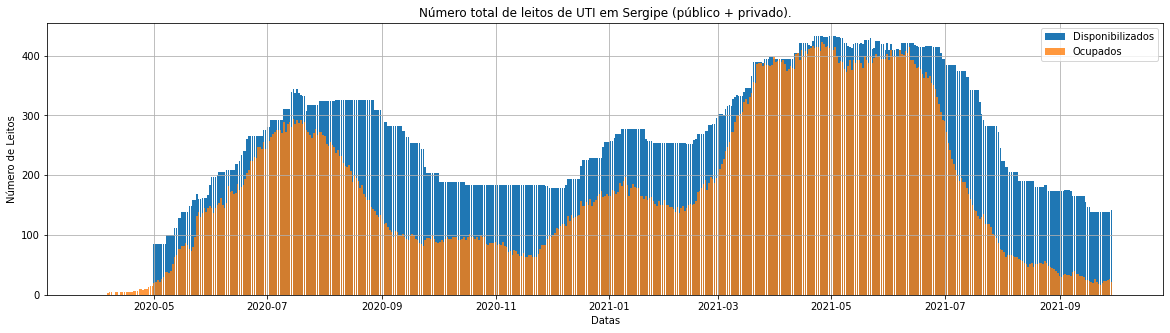

In [19]:
fig,ax = plt.subplots(figsize=(20, 5))
plt.bar(compilados_UTIs['DATA'], compilados_UTIs['Nº DE LEITOS UTI PÚBLICO E PRIVADO'], label='Disponibilizados')
plt.bar(compilados_UTIs['DATA'], compilados_UTIs['UTI SUS OCUPAÇÃO'] + compilados_UTIs['UTI PRIVADO OCUPAÇÃO'], label='Ocupados', alpha=0.8)
ax.set_title('Número total de leitos de UTI em Sergipe (público + privado).')
ax.set_ylabel('Número de Leitos')
ax.set_xlabel('Datas')
ax.legend()
plt.grid(True)

plt.show()

In [20]:
# Até o dia 30/04/2020 não há dados de Nº DE LEITOS UTI, mas existem dados de internado em UTI's
df_compilados[300:340]

,DATA,TESTES REALIZADOS,TESTES NEGATIVADOS,TESTES CONFIRMADOS,Nº DE CASOS POR DIA,MASCULINO,FEMININO,ÓBITOS,ISOLAMENTO DOMICILIAR,ALTA ISOLAMENTO DOMICILIAR,Nº DE LEITOS UTI PÚBLICO E PRIVADO,Nº DE LEITOS DE UTI PÚBLICO,Nº DE LEITOS DE UTI PRIVADO,Nº DE LEITOS ENFERMARIA PÚBLICO E PRIVADO,Nº DE LEITOS DE ENFERMARIA PÚBLICO,Nº DE LEITOS DE ENFERMARIA PRIVADO,INTERNADOS PÚBLICO E PRIVADO,UTI SUS OCUPAÇÃO,ENFERMARIA SUS OCUPAÇÃO,UTI PRIVADO OCUPAÇÃO,ENFERMARIA PRIVADO OCUPAÇÃO
300,2020-12-04 00:00:00,212793,121000,91793,75,40154,51639,2324,4788,84436,179,127.0,52.0,228,165.0,63.0,245,73,91,38,43
301,2020-12-03 00:00:00,212643,120925,91718,798,40123,51595,2320,4712,83907,179,127.0,52.0,238,175.0,63.0,239,70,94,33,42
302,2020-12-02 00:00:00,211689,120769,90920,534,39734,51186,2316,4709,83654,179,127.0,52.0,238,175.0,63.0,241,66,96,34,45
303,2020-12-01 00:00:00,211003,120617,90386,238,39499,50887,2312,4459,83392,179,127.0,52.0,236,175.0,61.0,223,64,85,32,42
304,2020-11-30 00:00:00,210612,120464,90148,150,39403,50745,2308,4391,83225,179,127.0,52.0,236,175.0,61.0,224,68,86,30,40
305,2020-11-29 00:00:00,210213,120215,89998,491,39339,50659,2304,4253,83225,182,127.0,55.0,238,175.0,63.0,216,70,86,23,37
306,2020-11-28 00:00:00,209151,119644,89507,508,39067,50440,2300,4010,82989,182,127.0,55.0,238,175.0,63.0,208,62,87,21,38
307,2020-11-27 00:00:00,207965,118966,88999,338,38850,50149,2296,3570,82927,183,127.0,56.0,238,175.0,63.0,206,62,82,22,40
308,2020-11-26 00:00:00,207166,118505,88661,561,38703,49958,2292,3935,82246,183,127.0,56.0,238,175.0,63.0,188,61,73,23,31
309,2020-11-25 00:00:00,205871,117771,88100,300,38457,49643,2288,3394,82246,183,127.0,56.0,238,175.0,63.0,172,55,65,22,34


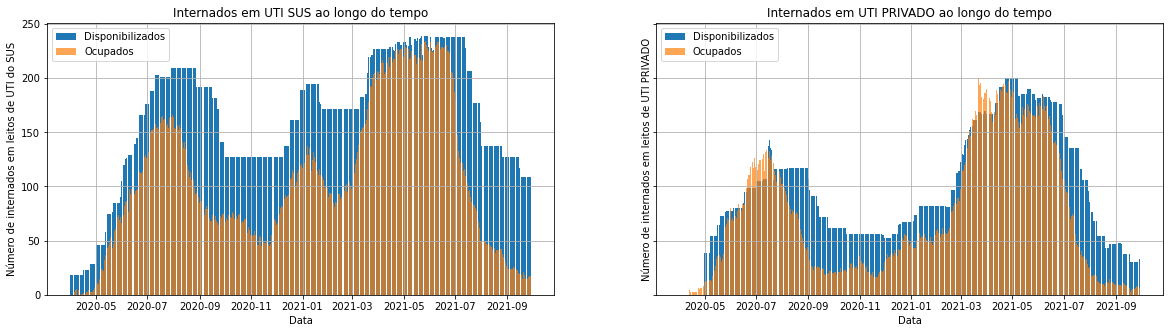

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey=True)

axes[0].bar(compilados_UTIs['DATA'], compilados_UTIs['Nº DE LEITOS DE UTI PÚBLICO'], label='Disponibilizados')
axes[0].bar(compilados_UTIs['DATA'], compilados_UTIs['UTI SUS OCUPAÇÃO'], label='Ocupados', alpha=0.7)
axes[0].set_ylabel('Número de internados em leitos de UTI do SUS')
axes[0].set_xlabel('Data')
axes[0].grid(True)
axes[0].set_title('Internados em UTI SUS ao longo do tempo')

axes[1].bar(compilados_UTIs['DATA'], compilados_UTIs['Nº DE LEITOS DE UTI PRIVADO'], label='Disponibilizados')
axes[1].bar(compilados_UTIs['DATA'], compilados_UTIs['UTI PRIVADO OCUPAÇÃO'], label='Ocupados', alpha=0.7)
axes[1].set_ylabel('Número de internados em leitos de UTI PRIVADO')
axes[1].set_xlabel('Data')
axes[1].grid(True)
axes[1].set_title('Internados em UTI PRIVADO ao longo do tempo')

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

plt.show()

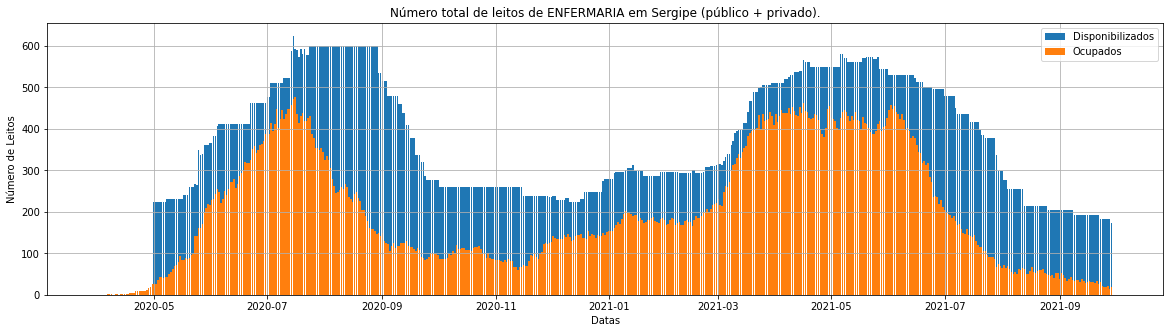

In [22]:
fig, ax = plt.subplots(figsize = (20, 5))

plt.bar(compilados_UTIs['DATA'], compilados_UTIs['Nº DE LEITOS  ENFERMARIA  PÚBLICO E PRIVADO'], label='Disponibilizados')
plt.bar(compilados_UTIs['DATA'], compilados_UTIs['ENFERMARIA SUS OCUPAÇÃO'] + compilados_UTIs['ENFERMARIA PRIVADO OCUPAÇÃO'], label='Ocupados')
ax.set_title('Número total de leitos de ENFERMARIA em Sergipe (público + privado).')
ax.set_ylabel('Número de Leitos')
ax.set_xlabel('Datas')
ax.legend()
plt.grid(True)


plt.show()

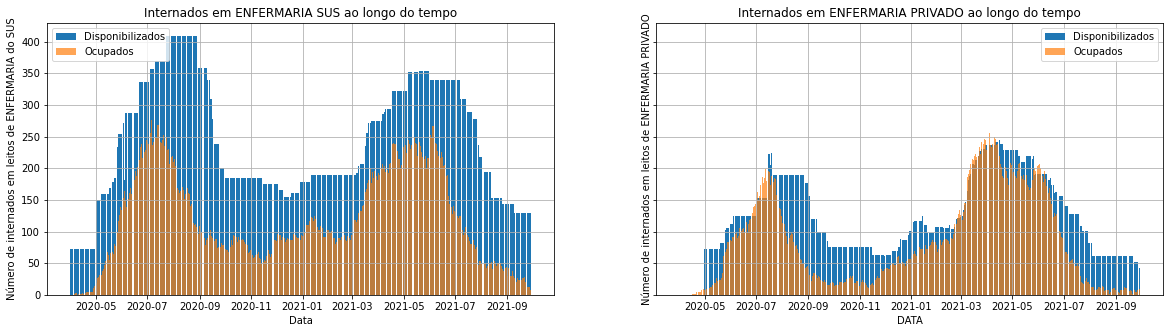

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey=True)

axes[0].bar(compilados_UTIs['DATA'], compilados_UTIs['Nº DE LEITOS DE ENFERMARIA PÚBLICO'], label='Disponibilizados')
axes[0].bar(compilados_UTIs['DATA'], compilados_UTIs['ENFERMARIA SUS OCUPAÇÃO'], label='Ocupados', alpha=0.7)
axes[0].set_ylabel('Número de internados em leitos de ENFERMARIA do SUS')
axes[0].set_xlabel('Data')
axes[0].grid(True)
axes[0].set_title('Internados em ENFERMARIA SUS ao longo do tempo')

axes[1].bar(compilados_UTIs['DATA'], compilados_UTIs['Nº DE LEITOS DE ENFERMARIA PRIVADO'], label='Disponibilizados')
axes[1].bar(compilados_UTIs['DATA'], compilados_UTIs['ENFERMARIA PRIVADO OCUPAÇÃO'], label='Ocupados', alpha=0.7)
axes[1].set_ylabel('Número de internados em leitos de ENFERMARIA PRIVADO')
axes[1].set_xlabel('DATA')
axes[1].grid(True)
axes[1].set_title('Internados em ENFERMARIA PRIVADO ao longo do tempo')

axes[0].legend(loc='upper left')
axes[1].legend()

plt.show()